# Game of Sets - largest card deck with no matches

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [241]:
# make_deck function initializes card deck df with names and attributes
def make_deck():
    card_names = pd.DataFrame(columns=['color', 'shape', 'fill', 'number'])
    card_names['color'] = ['red', 'green', 'purple']
    card_names['shape'] = ['oval', 'diamond', 'squiggle']
    card_names['fill'] = ['solid', 'striped', 'empty']
    card_names['number'] = [1, 2, 3]
    return card_names

In [247]:
# make_deck function prepopulates complete card deck df with all possible combinations  using numbers 0, 1, 2 for each of four attributes
def make_deck():
    card_deck = pd.DataFrame(columns=['color', 'shape', 'fill', 'number'])
    card_deck['color'] = [0] * 27 + [1] * 27 + [2] * 27
    card_deck['shape'] = ([0] * 9 + [1] * 9 + [2] * 9 ) * 3
    card_deck['fill'] =  ([0] * 3 + [1] * 3 + [2] * 3 ) * 9
    card_deck['number'] = [0, 1, 2] * 27
    return card_deck

In [8]:
# is_set function takes in three cards and returns True if they are a set, False otherwise
def is_set(card1, card2, card3):
    # check if all cards are the same card
    if card1.equals(card2) and card2.equals(card3):
        return False
    # check if any two cards are the same card
    if card1.equals(card2) or card2.equals(card3) or card1.equals(card3):
        return False
    # check if any two cards are not a set
    if (card1['color'] + card2['color'] + card3['color']) % 3 != 0:
        return False
    if (card1['shape'] + card2['shape'] + card3['shape']) % 3 != 0:
        return False
    if (card1['fill'] + card2['fill'] + card3['fill']) % 3 != 0:
        return False
    if (card1['number'] + card2['number'] + card3['number']) % 3 != 0:
        return False
    # if all checks pass, return True
    return True

In [9]:
# trim_sets function takes in a card deck and two cards selected by their index and returns a card deck with all cards making a set with those two cards removed
def trim_sets(card_deck, card1_index, card2_index):
    # check that card1_index and card2_index are in range
    if card1_index >= len(card_deck) or card2_index >= len(card_deck):
        print('Error: card index out of range')
        return card_deck
    # initialize empty list to store indices of sets
    sets = []
    # loop through all cards in deck
    for i in range(len(card_deck)):
        # check if cards are a set
        if is_set(card_deck.iloc[card1_index], card_deck.iloc[card2_index], card_deck.iloc[i]):
            # add index of set to sets list
            sets.append(i)
    # drop sets from card deck
    card_deck = card_deck.drop(sets)
    # reset index
    card_deck = card_deck.reset_index(drop=True)
    # return card deck
    return card_deck

In [271]:
# trim_deck function takes in a card deck and uses the trim sets function to trim all sets from the deck from a random starting point.
# iterations defaults to 100, but can be changed to trim more sets
def trim_deck(card_deck, iterations=100):
    for i in range(iterations):
        # pick two random cards from the deck
        card1_index = np.random.randint(len(card_deck))
        card2_index = np.random.randint(len(card_deck))
        # trim card deck of all sets with those two cards
        card_deck = trim_sets(card_deck, card1_index, card2_index)
    return card_deck

In [277]:
card_deck = make_deck()

In [279]:
print('length before is:', len(card_deck))
card_deck = trim_deck(card_deck, 200)
print('length after is:', len(card_deck))

length before is: 15
length after is: 15


In [262]:
print('length is:', len(card_deck))

# pick two random cards from the deck
card1_index = np.random.randint(len(card_deck))
card2_index = np.random.randint(len(card_deck))
# trim card deck of all sets with those two cards
card_deck = trim_sets(card_deck, card1_index, card2_index)

length is: 72


In [238]:
# Start from the first two cards and loop through trimming from there
# Optimal set may arise from trimming from a different starting point

print('starting deck size:', len(card_deck))
# loop through card deck using all possible combinations of two cards
for i in range(len(card_deck)):
    # exit loop if i is greater than the current card deck length
    if i >= len(card_deck):
        break
    for j in range(len(card_deck)):
        # exit loop if j is greater than the current card deck length
        if j >= len(card_deck):
            break
        # trim card deck of all sets with those two cards
        card_deck = trim_sets(card_deck, i, j)

starting deck size: 81


In [248]:
card_deck = make_deck()
len(card_deck)

81

(array([ 1.,  3.,  0., 16.,  0., 20., 39.,  0., 17.,  4.]),
 array([10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6, 14.2, 14.8, 15.4, 16. ]),
 <BarContainer object of 10 artists>)

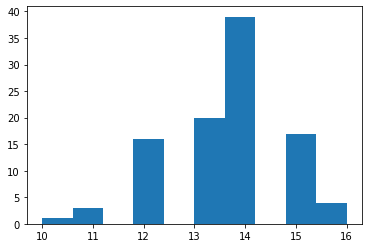

In [282]:
# trim a bunch of full card_decks and record the final lengths and resulting deck
trimmed_decks = []
trimmed_deck_lengths = []
for i in range(100):
    # make a new deck
    card_deck = make_deck()
    # trim the deck
    card_deck = trim_deck(card_deck)
    # run again if length is more than 15
    if len(card_deck) > 15:
        card_deck = trim_deck(card_deck, 1000)
    # add the deck to the list of trimmed decks
    trimmed_decks.append(card_deck)
    # add the length of the deck to the list of trimmed deck lengths
    trimmed_deck_lengths.append(len(card_deck))

# plot the distribution of trimmed deck lengths
plt.hist(trimmed_deck_lengths)

In [283]:
print(trimmed_deck_lengths)

[14, 12, 13, 14, 14, 15, 14, 14, 15, 14, 13, 13, 15, 14, 15, 14, 14, 13, 15, 14, 13, 14, 14, 14, 15, 15, 16, 12, 11, 16, 12, 15, 14, 14, 12, 13, 13, 15, 14, 15, 13, 14, 14, 16, 13, 13, 14, 14, 14, 14, 13, 14, 14, 13, 12, 14, 12, 12, 12, 10, 15, 14, 12, 13, 15, 12, 14, 14, 14, 14, 11, 15, 14, 14, 14, 13, 13, 14, 14, 15, 12, 12, 16, 15, 12, 15, 14, 11, 13, 14, 14, 14, 12, 13, 12, 12, 13, 13, 15, 13]


In [284]:
# print the decks from trimmed_decks with the longest length
for i in range(len(trimmed_decks)):
    if len(trimmed_decks[i]) == 16:
        print(trimmed_decks[i])

    color  shape  fill  number
0       0      1     1       1
1       0      2     0       0
2       1      0     0       0
3       1      0     1       1
4       1      0     1       2
5       1      1     1       1
6       1      1     1       2
7       1      2     0       1
8       1      2     0       2
9       2      0     0       0
10      2      0     0       2
11      2      0     1       0
12      2      0     1       2
13      2      1     0       1
14      2      1     0       2
15      2      2     1       2
    color  shape  fill  number
0       0      0     1       2
1       0      1     2       0
2       0      1     2       2
3       0      2     0       0
4       1      0     0       0
5       1      0     0       1
6       1      0     1       1
7       1      0     1       2
8       1      1     2       2
9       1      2     2       2
10      2      0     0       0
11      2      0     0       2
12      2      1     0       1
13      2      1     1       0
14      

In [250]:
trim_deck(card_deck)
print("length is: ", len(card_deck))
card_deck

length is:  81


,color,shape,fill,number
0,0,0,0,0
1,0,0,0,1
2,0,0,0,2
3,0,0,1,0
4,0,0,1,1
...,...,...,...,...
76,2,2,1,1
77,2,2,1,2
78,2,2,2,0
79,2,2,2,1


In [243]:
# trim_sets_loud function takes in a card deck and two cards selected by their index and returns a card deck with all cards making a set with those two cards removed
def trim_sets_loud(card_deck, card1_index, card2_index):
    # check that card1_index and card2_index are in range
    if card1_index >= len(card_deck) or card2_index >= len(card_deck):
        print('Error: card index out of range')
        return card_deck
    # initialize empty list to store indices of sets
    sets = []
    # loop through all cards in deck
    for i in range(len(card_deck)):
        # check if cards are a set
        if is_set(card_deck.iloc[card1_index], card_deck.iloc[card2_index], card_deck.iloc[i]):
            # add index of set to sets list
            sets.append(i)
    # drop sets from card deck
    print(card_deck.iloc[sets])
    card_deck = card_deck.drop(sets)
    # reset index
    card_deck = card_deck.reset_index(drop=True)
    # return card deck
    return card_deck

In [226]:
# manually trim once from one random pair of cards 
# pick two random cards from the deck
card1_index = np.random.randint(len(card_deck))
card2_index = np.random.randint(len(card_deck))

print(card_deck.iloc[[card1_index, card2_index]])
# trim card deck of all sets with those two cards
card_deck = trim_sets_loud(card_deck, card1_index, card2_index)

print('ending deck size:', len(card_deck))

   color  shape  fill  number
0      0      0     2       2
3      1      0     0       2
Empty DataFrame
Columns: [color, shape, fill, number]
Index: []
ending deck size: 12


In [239]:
len(card_deck)

16